In [1]:
%matplotlib inline

## Object detection using pre-trained YOLO models

In [1]:

from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
from IPython.display import Image

## Load a pretrained model

Let's get an YOLOv3 model trained with on Pascal VOC
dataset with Darknet53 as the base model. By specifying
``pretrained=True``, it will automatically download the model from the model
zoo if necessary. For more pretrained models



In [3]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

In [4]:
im_fname = utils.download('http://localhost:8889/view/Downloads/biking.jpg')
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)

Shape of pre-processed image: (1, 3, 512, 816)


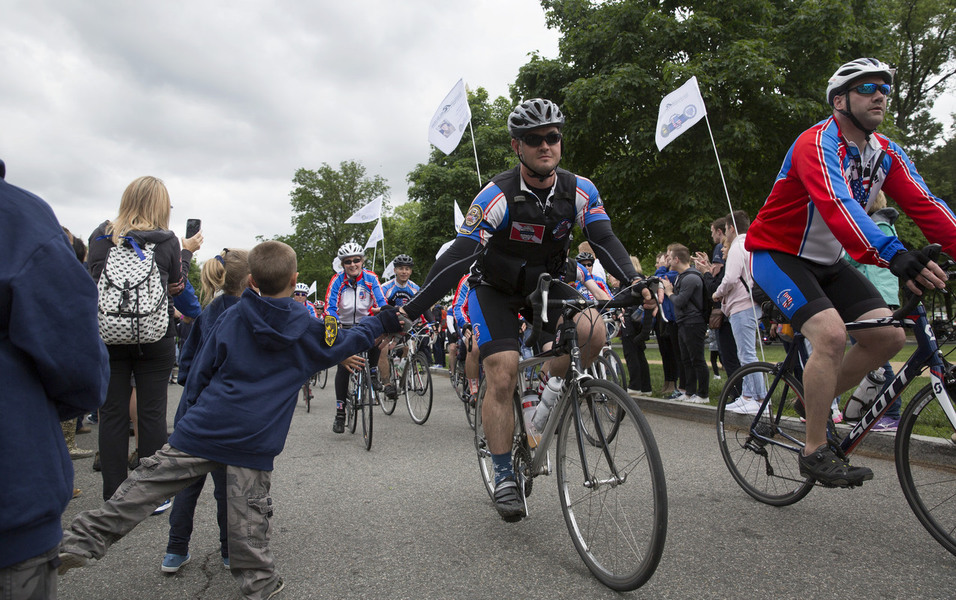

In [6]:
## Originl Image
Image(im_fname)

## Inference and display

The forward function will return all detected bounding boxes, and the
corresponding predicted class IDs and confidence scores. Their shapes are
`(batch_size, num_bboxes, 1)`, `(batch_size, num_bboxes, 1)`, and
`(batch_size, num_bboxes, 4)`, respectively.

We can use :py:func:`gluoncv.utils.viz.plot_bbox` to visualize the
results. We slice the results for the first image and feed them into `plot_bbox`:



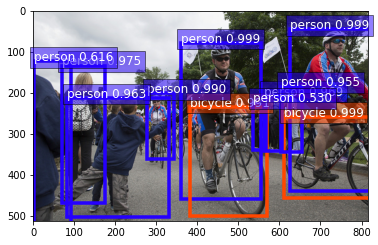

In [7]:
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()